<a href="https://colab.research.google.com/github/Shj-A/2022_ML_Project/blob/main/2017112205%EC%8B%A0%ED%9D%AC%EC%A4%80_ML_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import csv
import copy

#CSV -> list로 전환

In [ ]:
a_list = []
f = open("/content/drive/MyDrive/Colab Notebooks/2022M L sklearn/datasets-numeric-cloud.csv",'r')
rea = csv.reader(f)
for col in rea:
    a_list.append([col[0],col[1],col[3],col[4],col[5],col[6],col[2]]) # class로 사용할 계절을 맨 마지막 열로 가지는 리스트 생성
f.close()
print(a_list)

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 'S', '1.65', '1.8', '3.33', '1.69', 'AUTUMN'], ['2', 'U', '1.09', '0.79', '1.59', '0.74', 'AUTUMN'], ['3', 'S', '2.39', '0.36', '2.06', '0.81', 'WINTER'], ['4', 'U', '2.96', '1.27', '4.05', '1.44', 'WINTER'], ['5', 'S', '4.16', '2.16', '6.0', '2.48', 'WINTER'], ['6', 'U', '2.76', '0.87', '4.17', '0.84', 'WINTER'], ['7', 'U', '1.08', '0.85', '3.45', '0.37', 'WINTER'], ['8', 'S', '0.26', '0.47', '0.9', '0.37', 'WINTER'], ['9', 'U', '2.53', '1.08', '3.65', '1.33', 'SPRING'], ['10', 'S', '2.76', '3.1', '5.06', '3.38', 'SPRING'], ['11', 'S', '1.07', '0.64', '1.95', '0.69', 'SPRING'], ['12', 'U', '1.42', '1.08', '1.22', '1.42', 'SPRING'], ['13', 'S', '0.24', '0.44', '0.94', '0.44', 'SPRING'], ['14', 'U', '0.7', '0.67', '0.94', '0.76', 'SPRING'], ['15', 'S', '0.97', '1.66', '2.21', '1.13', 'SUMMER'], ['16', 'U', '1.06', '1.13', '1.46', '0.88', 'SUMMER'], ['45', 'S', '0.13', '0.27', '0.35', '0.17', 'SUMMER'], ['46', 'U', '0.1', '0

#1번
#Season열과 Seeded열 Encoding 

##1-1
Season 열의 2가지 클래스 Encoding

In [ ]:
le = LabelEncoder() 
le.fit(['SPRING','SUMMER','AUTUMN','WINTER'])
le.classes_

array(['AUTUMN', 'SPRING', 'SUMMER', 'WINTER'], dtype='<U6')

In [ ]:
item = []
for row in a_list[1:] :
    item.append(row[6]) # 각 행 마지막 열의 class 값만 추출
print(item)
item_enc = le.transform(item)
print(item_enc)

['AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER',

In [ ]:
a_list_enc = copy.deepcopy(a_list)
for i in range(0,108) :
    a_list_enc[i+1][6] = item_enc[i] # class value = encoding class value
print(a_list_enc)
print(a_list)

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 'S', '1.65', '1.8', '3.33', '1.69', 0], ['2', 'U', '1.09', '0.79', '1.59', '0.74', 0], ['3', 'S', '2.39', '0.36', '2.06', '0.81', 3], ['4', 'U', '2.96', '1.27', '4.05', '1.44', 3], ['5', 'S', '4.16', '2.16', '6.0', '2.48', 3], ['6', 'U', '2.76', '0.87', '4.17', '0.84', 3], ['7', 'U', '1.08', '0.85', '3.45', '0.37', 3], ['8', 'S', '0.26', '0.47', '0.9', '0.37', 3], ['9', 'U', '2.53', '1.08', '3.65', '1.33', 1], ['10', 'S', '2.76', '3.1', '5.06', '3.38', 1], ['11', 'S', '1.07', '0.64', '1.95', '0.69', 1], ['12', 'U', '1.42', '1.08', '1.22', '1.42', 1], ['13', 'S', '0.24', '0.44', '0.94', '0.44', 1], ['14', 'U', '0.7', '0.67', '0.94', '0.76', 1], ['15', 'S', '0.97', '1.66', '2.21', '1.13', 2], ['16', 'U', '1.06', '1.13', '1.46', '0.88', 2], ['45', 'S', '0.13', '0.27', '0.35', '0.17', 2], ['46', 'U', '0.1', '0.3', '0.34', '0.25', 2], ['47', 'U', '0.38', '0.58', '0.67', '0.78', 2], ['48', 'S', '0.45', '0.43', '0.44', '0.4', 2],

Seeded 열의 2가지 클래스 Encoding

In [ ]:
le.fit(['S','U'])
le.classes_

array(['S', 'U'], dtype='<U1')

In [ ]:
item = []
for row in a_list[1:] :
    item.append(row[1])
print(item)
item_enc = le.transform(item)
print(item_enc)

['S', 'U', 'S', 'U', 'S', 'U', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U']
[0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1]


In [ ]:
for i in range(0,108) :
    a_list_enc[i+1][1] = item_enc[i]
print(a_list_enc)
print(a_list)

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 0, '1.65', '1.8', '3.33', '1.69', 0], ['2', 1, '1.09', '0.79', '1.59', '0.74', 0], ['3', 0, '2.39', '0.36', '2.06', '0.81', 3], ['4', 1, '2.96', '1.27', '4.05', '1.44', 3], ['5', 0, '4.16', '2.16', '6.0', '2.48', 3], ['6', 1, '2.76', '0.87', '4.17', '0.84', 3], ['7', 1, '1.08', '0.85', '3.45', '0.37', 3], ['8', 0, '0.26', '0.47', '0.9', '0.37', 3], ['9', 1, '2.53', '1.08', '3.65', '1.33', 1], ['10', 0, '2.76', '3.1', '5.06', '3.38', 1], ['11', 0, '1.07', '0.64', '1.95', '0.69', 1], ['12', 1, '1.42', '1.08', '1.22', '1.42', 1], ['13', 0, '0.24', '0.44', '0.94', '0.44', 1], ['14', 1, '0.7', '0.67', '0.94', '0.76', 1], ['15', 0, '0.97', '1.66', '2.21', '1.13', 2], ['16', 1, '1.06', '1.13', '1.46', '0.88', 2], ['45', 0, '0.13', '0.27', '0.35', '0.17', 2], ['46', 1, '0.1', '0.3', '0.34', '0.25', 2], ['47', 1, '0.38', '0.58', '0.67', '0.78', 2], ['48', 0, '0.45', '0.43', '0.44', '0.4', 2], ['49', 0, '0.42', '0.47', '0.53', '0.52

#2번
#클래스를 제외한 나머지 값 정규화

문자열로 들어있는 수치들 형변환

In [ ]:
for i in range(1,109):
    for j in range(0,6):
        a_list_enc[i][j] = float( a_list_enc[i][j])
print(a_list_enc)

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], [1.0, 0.0, 1.65, 1.8, 3.33, 1.69, 0], [2.0, 1.0, 1.09, 0.79, 1.59, 0.74, 0], [3.0, 0.0, 2.39, 0.36, 2.06, 0.81, 3], [4.0, 1.0, 2.96, 1.27, 4.05, 1.44, 3], [5.0, 0.0, 4.16, 2.16, 6.0, 2.48, 3], [6.0, 1.0, 2.76, 0.87, 4.17, 0.84, 3], [7.0, 1.0, 1.08, 0.85, 3.45, 0.37, 3], [8.0, 0.0, 0.26, 0.47, 0.9, 0.37, 3], [9.0, 1.0, 2.53, 1.08, 3.65, 1.33, 1], [10.0, 0.0, 2.76, 3.1, 5.06, 3.38, 1], [11.0, 0.0, 1.07, 0.64, 1.95, 0.69, 1], [12.0, 1.0, 1.42, 1.08, 1.22, 1.42, 1], [13.0, 0.0, 0.24, 0.44, 0.94, 0.44, 1], [14.0, 1.0, 0.7, 0.67, 0.94, 0.76, 1], [15.0, 0.0, 0.97, 1.66, 2.21, 1.13, 2], [16.0, 1.0, 1.06, 1.13, 1.46, 0.88, 2], [45.0, 0.0, 0.13, 0.27, 0.35, 0.17, 2], [46.0, 1.0, 0.1, 0.3, 0.34, 0.25, 2], [47.0, 1.0, 0.38, 0.58, 0.67, 0.78, 2], [48.0, 0.0, 0.45, 0.43, 0.44, 0.4, 2], [49.0, 0.0, 0.42, 0.47, 0.53, 0.52, 0], [50.0, 1.0, 2.24, 4.02, 2.52, 2.73, 0], [51.0, 1.0, 0.52, 1.32, 2.18, 0.9, 0], [52.0, 0.0, 0.94, 1.59, 1.73, 1.62, 0], 

## 2-1 MinMaxScaler

In [ ]:
from sklearn import preprocessing

In [ ]:
a_list_enc_norm = copy.deepcopy(a_list_enc)
num_data = []
for item in a_list_enc_norm[1:]:
    item = item[:-1]
    num_data.append(item)
print(num_data) # class를 제외한 data생성

[[1.0, 0.0, 1.65, 1.8, 3.33, 1.69], [2.0, 1.0, 1.09, 0.79, 1.59, 0.74], [3.0, 0.0, 2.39, 0.36, 2.06, 0.81], [4.0, 1.0, 2.96, 1.27, 4.05, 1.44], [5.0, 0.0, 4.16, 2.16, 6.0, 2.48], [6.0, 1.0, 2.76, 0.87, 4.17, 0.84], [7.0, 1.0, 1.08, 0.85, 3.45, 0.37], [8.0, 0.0, 0.26, 0.47, 0.9, 0.37], [9.0, 1.0, 2.53, 1.08, 3.65, 1.33], [10.0, 0.0, 2.76, 3.1, 5.06, 3.38], [11.0, 0.0, 1.07, 0.64, 1.95, 0.69], [12.0, 1.0, 1.42, 1.08, 1.22, 1.42], [13.0, 0.0, 0.24, 0.44, 0.94, 0.44], [14.0, 1.0, 0.7, 0.67, 0.94, 0.76], [15.0, 0.0, 0.97, 1.66, 2.21, 1.13], [16.0, 1.0, 1.06, 1.13, 1.46, 0.88], [45.0, 0.0, 0.13, 0.27, 0.35, 0.17], [46.0, 1.0, 0.1, 0.3, 0.34, 0.25], [47.0, 1.0, 0.38, 0.58, 0.67, 0.78], [48.0, 0.0, 0.45, 0.43, 0.44, 0.4], [49.0, 0.0, 0.42, 0.47, 0.53, 0.52], [50.0, 1.0, 2.24, 4.02, 2.52, 2.73], [51.0, 1.0, 0.52, 1.32, 2.18, 0.9], [52.0, 0.0, 0.94, 1.59, 1.73, 1.62], [53.0, 1.0, 1.19, 0.85, 2.31, 0.93], [54.0, 0.0, 0.76, 0.71, 1.28, 0.63], [55.0, 0.0, 0.13, 0.59, 0.91, 0.42], [56.0, 1.0, 1.5, 0

In [ ]:
print(num_data)
data = np.array(num_data)

[[1.0, 0.0, 1.65, 1.8, 3.33, 1.69], [2.0, 1.0, 1.09, 0.79, 1.59, 0.74], [3.0, 0.0, 2.39, 0.36, 2.06, 0.81], [4.0, 1.0, 2.96, 1.27, 4.05, 1.44], [5.0, 0.0, 4.16, 2.16, 6.0, 2.48], [6.0, 1.0, 2.76, 0.87, 4.17, 0.84], [7.0, 1.0, 1.08, 0.85, 3.45, 0.37], [8.0, 0.0, 0.26, 0.47, 0.9, 0.37], [9.0, 1.0, 2.53, 1.08, 3.65, 1.33], [10.0, 0.0, 2.76, 3.1, 5.06, 3.38], [11.0, 0.0, 1.07, 0.64, 1.95, 0.69], [12.0, 1.0, 1.42, 1.08, 1.22, 1.42], [13.0, 0.0, 0.24, 0.44, 0.94, 0.44], [14.0, 1.0, 0.7, 0.67, 0.94, 0.76], [15.0, 0.0, 0.97, 1.66, 2.21, 1.13], [16.0, 1.0, 1.06, 1.13, 1.46, 0.88], [45.0, 0.0, 0.13, 0.27, 0.35, 0.17], [46.0, 1.0, 0.1, 0.3, 0.34, 0.25], [47.0, 1.0, 0.38, 0.58, 0.67, 0.78], [48.0, 0.0, 0.45, 0.43, 0.44, 0.4], [49.0, 0.0, 0.42, 0.47, 0.53, 0.52], [50.0, 1.0, 2.24, 4.02, 2.52, 2.73], [51.0, 1.0, 0.52, 1.32, 2.18, 0.9], [52.0, 0.0, 0.94, 1.59, 1.73, 1.62], [53.0, 1.0, 1.19, 0.85, 2.31, 0.93], [54.0, 0.0, 0.76, 0.71, 1.28, 0.63], [55.0, 0.0, 0.13, 0.59, 0.91, 0.42], [56.0, 1.0, 1.5, 0

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = min_max_scaler.fit_transform(data)
print(data_scaled)

[[0.         0.         0.17515924 0.445      0.42179487 0.28166667]
 [0.00518135 1.         0.11571125 0.1925     0.19871795 0.12333333]
 [0.01036269 0.         0.2537155  0.085      0.25897436 0.135     ]
 [0.01554404 1.         0.31422505 0.3125     0.51410256 0.24      ]
 [0.02072539 0.         0.44161359 0.535      0.76410256 0.41333333]
 [0.02590674 1.         0.29299363 0.2125     0.52948718 0.14      ]
 [0.03108808 1.         0.11464968 0.2075     0.43717949 0.06166667]
 [0.03626943 0.         0.02760085 0.1125     0.11025641 0.06166667]
 [0.04145078 1.         0.26857749 0.265      0.46282051 0.22166667]
 [0.04663212 0.         0.29299363 0.77       0.64358974 0.56333333]
 [0.05181347 0.         0.11358811 0.155      0.24487179 0.115     ]
 [0.05699482 1.         0.1507431  0.265      0.15128205 0.23666667]
 [0.06217617 0.         0.02547771 0.105      0.11538462 0.07333333]
 [0.06735751 1.         0.07430998 0.1625     0.11538462 0.12666667]
 [0.07253886 0.         0.1029724 

##2-2 StandardScaler

In [ ]:
X_train = num_data[0:80]
X_test = num_data[80:]

print('X_train\n',X_train)

X_train
 [[1.0, 0.0, 1.65, 1.8, 3.33, 1.69], [2.0, 1.0, 1.09, 0.79, 1.59, 0.74], [3.0, 0.0, 2.39, 0.36, 2.06, 0.81], [4.0, 1.0, 2.96, 1.27, 4.05, 1.44], [5.0, 0.0, 4.16, 2.16, 6.0, 2.48], [6.0, 1.0, 2.76, 0.87, 4.17, 0.84], [7.0, 1.0, 1.08, 0.85, 3.45, 0.37], [8.0, 0.0, 0.26, 0.47, 0.9, 0.37], [9.0, 1.0, 2.53, 1.08, 3.65, 1.33], [10.0, 0.0, 2.76, 3.1, 5.06, 3.38], [11.0, 0.0, 1.07, 0.64, 1.95, 0.69], [12.0, 1.0, 1.42, 1.08, 1.22, 1.42], [13.0, 0.0, 0.24, 0.44, 0.94, 0.44], [14.0, 1.0, 0.7, 0.67, 0.94, 0.76], [15.0, 0.0, 0.97, 1.66, 2.21, 1.13], [16.0, 1.0, 1.06, 1.13, 1.46, 0.88], [45.0, 0.0, 0.13, 0.27, 0.35, 0.17], [46.0, 1.0, 0.1, 0.3, 0.34, 0.25], [47.0, 1.0, 0.38, 0.58, 0.67, 0.78], [48.0, 0.0, 0.45, 0.43, 0.44, 0.4], [49.0, 0.0, 0.42, 0.47, 0.53, 0.52], [50.0, 1.0, 2.24, 4.02, 2.52, 2.73], [51.0, 1.0, 0.52, 1.32, 2.18, 0.9], [52.0, 0.0, 0.94, 1.59, 1.73, 1.62], [53.0, 1.0, 1.19, 0.85, 2.31, 0.93], [54.0, 0.0, 0.76, 0.71, 1.28, 0.63], [55.0, 0.0, 0.13, 0.59, 0.91, 0.42], [56.0, 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
for item in X_train :
    print(item)

[-1.74365233 -1.          0.21929344  0.87564684  0.84549182  0.72031364]
[-1.71986444  1.         -0.27563583 -0.43095085 -0.34693433 -0.4449447 ]
[-1.69607655 -1.          0.87330712 -0.98722511 -0.02484221 -0.35908356]
[-1.67228866  1.          1.37707441  0.19000647  1.33890953  0.41366671]
[-1.64850077 -1.          2.43763713  1.34136483  2.67524918  1.68931795]
[-1.62471288  1.          1.20031396 -0.32745796  1.42114582 -0.32228593]
[-1.60092499  1.         -0.28447386 -0.35333118  0.9277281  -0.89878216]
[-1.5771371  -1.         -1.00919172 -0.84492239 -0.81979298 -0.89878216]
[-1.55334921  1.          0.99703943 -0.05578913  1.06478858  0.27874206]
[-1.52956132 -1.          1.20031396  2.55740624  2.03106494  2.7932469 ]
[-1.50577343 -1.         -0.29331188 -0.62500001 -0.10022547 -0.50627408]
[-1.48198554  1.          0.01601892 -0.05578913 -0.60049621  0.38913496]
[-1.45819765 -1.         -1.02686776 -0.88373222 -0.79238088 -0.81292102]
[-1.43440976  1.         -0.62031872 -

In [ ]:
X_test = scaler.transform(X_test) 
for item in X_test :
    print(item)

[ 1.39634914 -1.         -1.10640997 -1.28476716 -1.14873812 -1.08277032]
[ 1.42013703  1.         -0.07236131 -0.71555628 -0.38119945  0.00889276]
[ 1.44392492 -1.          0.75841282 -0.10753558 -0.56623109  0.80617478]
[1.46771281 1.         4.01964319 3.68289138 2.24350868 4.92750955]
[ 2.30028895  1.         -1.07105787 -1.090718   -0.95685345 -1.20542909]
[ 2.32407684 -1.         -0.9650016  -1.15540105 -0.86776414 -0.89878216]
[ 2.34786473 -1.          0.03369496  2.60915269 -0.84720507  4.74352139]
[ 2.37165262  1.         -0.97383963 -0.52150712 -0.49084783 -0.65346461]
[ 2.39544051 -1.         -1.14176206 -1.27183055 -1.03908974 -1.19316321]
[2.4192284  1.         1.995736   0.92739329 2.23665565 1.67705207]
[ 2.44301629  1.         -0.23144572 -0.40507762 -0.00428314 -0.11376601]
[ 2.46680418 -1.         -0.09003736 -1.01309833  0.24242572 -0.67799637]
[ 2.49059207 -1.         -1.19479019 -0.96135189 -0.81979298 -1.05823856]
[2.51437996 1.         0.38721587 0.78509057 0.160

a_list_enc_norm(MinMaxScaler 결과 채택) 생성

In [ ]:
for i in range(0,108):
    for j in range(0,6) :
        a_list_enc_norm[i+1][j] = data_scaled[i][j]
print(a_list_enc_norm)

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], [0.0, 0.0, 0.1751592356687898, 0.4450000000000001, 0.42179487179487185, 0.2816666666666666, 0], [0.0051813471502590676, 1.0, 0.11571125265392783, 0.19250000000000006, 0.19871794871794873, 0.12333333333333332, 0], [0.010362694300518133, 0.0, 0.2537154989384289, 0.085, 0.25897435897435905, 0.135, 3], [0.015544041450777202, 1.0, 0.31422505307855625, 0.31250000000000006, 0.5141025641025642, 0.24, 3], [0.02072538860103627, 0.0, 0.4416135881104034, 0.5350000000000001, 0.7641025641025643, 0.41333333333333333, 3], [0.025906735751295335, 1.0, 0.2929936305732484, 0.21250000000000005, 0.5294871794871796, 0.13999999999999999, 3], [0.031088082901554407, 1.0, 0.11464968152866244, 0.20750000000000005, 0.4371794871794873, 0.06166666666666666, 3], [0.036269430051813475, 0.0, 0.027600849256900213, 0.11250000000000002, 0.11025641025641028, 0.06166666666666666, 3], [0.04145077720207254, 1.0, 0.26857749469214437, 0.26500000000000007, 0.4628205128205

#3번 데이터셋 분리

##3-1 class열 분리 함수 작성

In [ ]:
def data_splite(data_list) :
    Xd = []
    Yd = []
    for item in data_list[1:]: #column Name 제외한 모든 row에서 class값만 분리해서 Yd에 저장하고 나머지는 Xd에 저장  
        Xd.append(item[:-1])
        Yd.append(item[-1])
    res = []
    res.append(Xd)
    res.append(Yd)

    return res

##3-2 Test/Train 분류

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Origin = data_splite(a_list_enc_norm)
X_data = Origin[0]
Y_data = Origin[1]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=33)
print("X_train\n",X_train,"\n","X_test\n", X_test,"\n","Y_train\n", Y_train,"\n","Y_test\n", Y_test)

X_train
 [[0.689119170984456, 1.0, 0.14012738853503187, 0.1375, 0.19230769230769232, 0.185], [0.2849740932642487, 1.0, 0.15923566878980894, 0.05500000000000001, 0.1423076923076923, 0.10666666666666666], [0.533678756476684, 0.0, 0.0, 0.005000000000000001, 0.0, 0.0], [0.025906735751295335, 1.0, 0.2929936305732484, 0.21250000000000005, 0.5294871794871796, 0.13999999999999999], [0.04663212435233161, 0.0, 0.2929936305732484, 0.7700000000000002, 0.6435897435897436, 0.5633333333333332], [0.6580310880829016, 0.0, 0.2250530785562633, 0.6875000000000001, 0.5641025641025642, 0.3483333333333333], [0.49222797927461137, 0.0, 0.22611464968152867, 0.2775, 0.29358974358974366, 0.2033333333333333], [0.3471502590673575, 0.0, 0.02653927813163482, 0.11000000000000003, 0.10897435897435899, 0.065], [0.694300518134715, 0.0, 0.23991507430997874, 0.25500000000000006, 0.15769230769230771, 0.29333333333333333], [0.06735751295336788, 1.0, 0.07430997876857749, 0.16250000000000003, 0.11538461538461539, 0.12666666666

#4번
#Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

##4-1 hidden layer with different node

In [ ]:
size_list = [(30),(25),(20),(15),(10),(30,15),(25,13),(20,10),(15,8),(10,5)] # 1층 모델 5개 + 2층 모델 5개로 ㄹ리스트 생성
acc_list = [] # 정확도를 저장할 리스트
pre_list = [] # 예측값들을 저장할 리스트
for i in size_list: #모델 사이즈를 변수로 하여 모델별 예측 수행
    clf =  MLPClassifier(hidden_layer_sizes=i)
    clf = clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    pre_list.append(pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
index = 0
for item in pre_list :
    index +=1
    print("predictions",index,"\n",item)

predictions 1 
 [3 1 3 2 3 2 1 1 1 1 1 1 2 1 2 1 0 1 3 1 1 3 2 1 1 1 1 1 3 2 3 3 1]
predictions 2 
 [3 3 3 2 3 3 1 3 1 1 1 3 2 1 1 1 3 3 3 1 3 3 0 3 1 1 1 1 3 3 3 3 1]
predictions 3 
 [3 3 3 2 3 2 1 3 1 1 2 3 2 1 2 1 2 3 3 1 3 3 2 3 1 1 1 1 3 2 3 3 1]
predictions 4 
 [2 2 2 2 2 2 1 1 1 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 2 2 1 1]
predictions 5 
 [0 0 2 2 0 0 1 3 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 3 1]
predictions 6 
 [2 3 3 2 3 2 1 3 1 1 2 3 2 1 2 1 2 0 3 1 3 3 2 3 1 3 1 1 3 2 3 3 1]
predictions 7 
 [3 3 3 2 3 2 0 3 1 1 1 3 2 0 1 2 3 3 3 1 3 3 2 3 0 1 1 3 3 2 3 3 1]
predictions 8 
 [2 3 3 2 3 2 1 3 1 1 1 3 2 0 2 2 2 3 2 1 0 3 2 3 1 1 1 1 3 2 3 3 1]
predictions 9 
 [2 3 3 2 3 2 1 3 1 1 2 3 2 1 2 1 0 3 3 1 3 3 0 3 1 1 1 1 1 2 3 3 1]
predictions 10 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 4-2 정확도 비교

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
for item in pre_list :
    acc = accuracy_score(Y_test, item)
    acc_list.append(acc)

print(acc_list)

[0.18181818181818182, 0.18181818181818182, 0.18181818181818182, 0.18181818181818182, 0.21212121212121213, 0.21212121212121213, 0.21212121212121213, 0.18181818181818182, 0.21212121212121213, 0.21212121212121213]


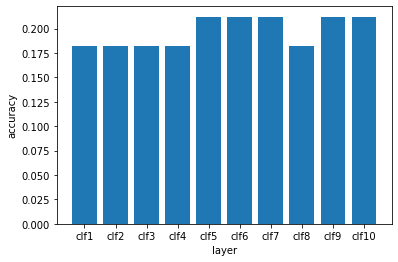

In [ ]:
model = ['clf1', 'clf2', 'clf3', 'clf4', 'clf5','clf6','clf7', 'clf8', 'clf9', 'clf10'] # score를 이용한 그래프 그리기
x = np.arange(10)
plt.bar(x, acc_list)
plt.xticks(x, model)
plt.xlabel('layer')
plt.ylabel('accuracy')
plt.show()

## 4-3 활성화 함수 변경해서 비교

In [ ]:
actf_list = ['identity','logistic','tanh','relu']# 활성화 함수 종류 리스트
acc_list = []
for i in actf_list:#활성화 함수 파라미터를 변수로 두고 모델 생성 및 예측, 정확도 도출
    clf =  MLPClassifier(activation=i)
    clf = clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    acc_list.append(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print(acc_list)

[0.24242424242424243, 0.21212121212121213, 0.24242424242424243, 0.18181818181818182]


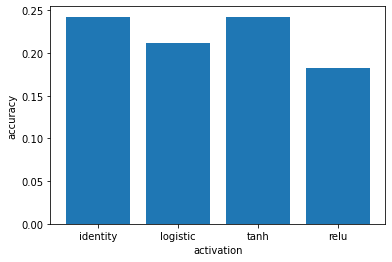

In [ ]:
x = np.arange(4)
plt.bar(x, acc_list)
plt.xticks(x, actf_list)
plt.xlabel('activation')
plt.ylabel('accuracy')
plt.show()

##4-4 모멘텀 변경하여 비교

In [ ]:
mon_list = [0,0.1,0.3,0.5,0.7,0.9]# 모멘텀 리스트
acc_list = []
for i in mon_list:#모멘텀 파라미터를 변수로 두고 모델 생성 및 예측, 정확도 도출
    clf =  MLPClassifier(momentum=i)
    clf = clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    acc_list.append(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
print(acc_list)

[0.21212121212121213, 0.18181818181818182, 0.21212121212121213, 0.21212121212121213, 0.21212121212121213, 0.21212121212121213]


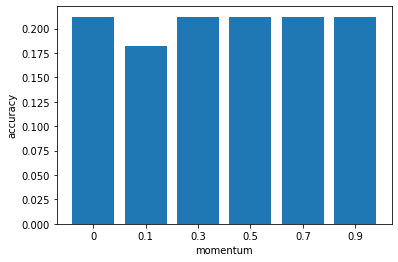

In [ ]:
x = np.arange(6)
plt.bar(x, acc_list)
plt.xticks(x, mon_list)
plt.xlabel('momentum')
plt.ylabel('accuracy')
plt.show()

##4-5 learing rate 변경하여 비교

In [ ]:
clf1 = MLPClassifier(learning_rate= 'constant')
clf2 = MLPClassifier(learning_rate= 'invscaling')
clf3 = MLPClassifier(learning_rate= 'adaptive')
clf4 = MLPClassifier(learning_rate= 'constant', learning_rate_init= 0.002) # 함수 종류가 3가지이므로 나머지는 init을 변경
clf5 = MLPClassifier(learning_rate= 'constant', learning_rate_init= 0.01)

clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
clf3.fit(X_train,Y_train)
clf4.fit(X_train,Y_train)
clf5.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MLPClassifier(learning_rate_init=0.01)

In [ ]:
predictions1 = clf1.predict(X_test)
predictions2 = clf2.predict(X_test)
predictions3 = clf3.predict(X_test)
predictions4 = clf4.predict(X_test)
predictions5 = clf5.predict(X_test)

pre_list = [predictions1, predictions2, predictions3, predictions4, predictions5]
acc_list = []

for item in pre_list :
    acc = accuracy_score(Y_test, item)
    acc_list.append(acc)

print(acc_list)

[0.24242424242424243, 0.18181818181818182, 0.21212121212121213, 0.3333333333333333, 0.2727272727272727]


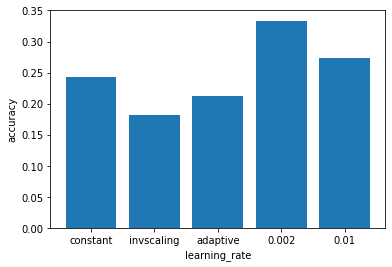

In [ ]:
model = ['constant', 'invscaling','adaptive','0.002','0.01']
x = np.arange(5)
plt.bar(x, acc_list)
plt.xticks(x, model)
plt.xlabel('learning_rate')
plt.ylabel('accuracy')
plt.show()

#5번
#Discretization

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
#numeric value 범위가 0~5까지라 n_bin = 6으로 설정

In [ ]:
X = copy.deepcopy(a_list_enc[1:]) #column 명을 제외한 리스트 생성
X_num_data = []
for item in X:
    item = item[:-1]
    X_num_data.append(item)
print(X_num_data) # class를 제외한 data생성

[[1.0, 0.0, 1.65, 1.8, 3.33, 1.69], [2.0, 1.0, 1.09, 0.79, 1.59, 0.74], [3.0, 0.0, 2.39, 0.36, 2.06, 0.81], [4.0, 1.0, 2.96, 1.27, 4.05, 1.44], [5.0, 0.0, 4.16, 2.16, 6.0, 2.48], [6.0, 1.0, 2.76, 0.87, 4.17, 0.84], [7.0, 1.0, 1.08, 0.85, 3.45, 0.37], [8.0, 0.0, 0.26, 0.47, 0.9, 0.37], [9.0, 1.0, 2.53, 1.08, 3.65, 1.33], [10.0, 0.0, 2.76, 3.1, 5.06, 3.38], [11.0, 0.0, 1.07, 0.64, 1.95, 0.69], [12.0, 1.0, 1.42, 1.08, 1.22, 1.42], [13.0, 0.0, 0.24, 0.44, 0.94, 0.44], [14.0, 1.0, 0.7, 0.67, 0.94, 0.76], [15.0, 0.0, 0.97, 1.66, 2.21, 1.13], [16.0, 1.0, 1.06, 1.13, 1.46, 0.88], [45.0, 0.0, 0.13, 0.27, 0.35, 0.17], [46.0, 1.0, 0.1, 0.3, 0.34, 0.25], [47.0, 1.0, 0.38, 0.58, 0.67, 0.78], [48.0, 0.0, 0.45, 0.43, 0.44, 0.4], [49.0, 0.0, 0.42, 0.47, 0.53, 0.52], [50.0, 1.0, 2.24, 4.02, 2.52, 2.73], [51.0, 1.0, 0.52, 1.32, 2.18, 0.9], [52.0, 0.0, 0.94, 1.59, 1.73, 1.62], [53.0, 1.0, 1.19, 0.85, 2.31, 0.93], [54.0, 0.0, 0.76, 0.71, 1.28, 0.63], [55.0, 0.0, 0.13, 0.59, 0.91, 0.42], [56.0, 1.0, 1.5, 0

In [ ]:
disc.fit(X_num_data)
Xt = disc.transform(X_num_data) # discretization 실행
Xt

array([[0., 0., 1., 2., 2., 1.],
       [0., 5., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 5., 1., 1., 3., 1.],
       [0., 0., 2., 3., 4., 2.],
       [0., 5., 1., 1., 3., 0.],
       [0., 5., 0., 1., 2., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 5., 1., 1., 2., 1.],
       [0., 0., 1., 4., 3., 3.],
       [0., 0., 0., 0., 1., 0.],
       [0., 5., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 2., 1., 1.],
       [0., 5., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 5., 0., 0., 0., 0.],
       [1., 5., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 5., 1., 5., 1., 2.],
       [1., 5., 0., 1., 1., 0.],
       [1., 0., 0., 2., 1., 1.],
       [1., 5., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 5., 0., 0., 0., 0.],
       [1., 5., 0., 0., 1., 0.],
       [1., 0., 1., 0., 2., 0.],
       [1.

In [ ]:
Xt_list = Xt.tolist() # 클래스 value로 합치기 위해 리스트로 자료형 변경
Xt_list

[[0.0, 0.0, 1.0, 2.0, 2.0, 1.0],
 [0.0, 5.0, 0.0, 1.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 [0.0, 5.0, 1.0, 1.0, 3.0, 1.0],
 [0.0, 0.0, 2.0, 3.0, 4.0, 2.0],
 [0.0, 5.0, 1.0, 1.0, 3.0, 0.0],
 [0.0, 5.0, 0.0, 1.0, 2.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 5.0, 1.0, 1.0, 2.0, 1.0],
 [0.0, 0.0, 1.0, 4.0, 3.0, 3.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 5.0, 0.0, 1.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 5.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 2.0, 1.0, 1.0],
 [0.0, 5.0, 0.0, 1.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 5.0, 1.0, 5.0, 1.0, 2.0],
 [1.0, 5.0, 0.0, 1.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 2.0, 1.0, 1.0],
 [1.0, 5.0, 0.0, 1.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 5.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 2.0, 0.0],
 [1.0, 5.0

In [ ]:
for i in range(0,108): # class value와 결합된 list 생성
    Xt_list[i] = Xt_list[i]+a_list_enc[i+1][-1:]
Xt_list

[[0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0],
 [0.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0],
 [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3],
 [0.0, 5.0, 1.0, 1.0, 3.0, 1.0, 3],
 [0.0, 0.0, 2.0, 3.0, 4.0, 2.0, 3],
 [0.0, 5.0, 1.0, 1.0, 3.0, 0.0, 3],
 [0.0, 5.0, 0.0, 1.0, 2.0, 0.0, 3],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3],
 [0.0, 5.0, 1.0, 1.0, 2.0, 1.0, 1],
 [0.0, 0.0, 1.0, 4.0, 3.0, 3.0, 1],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1],
 [0.0, 5.0, 0.0, 1.0, 0.0, 1.0, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1],
 [0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1],
 [0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2],
 [0.0, 5.0, 0.0, 1.0, 1.0, 0.0, 2],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
 [1.0, 5.0, 1.0, 5.0, 1.0, 2.0, 0],
 [1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0],
 [1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0],
 [1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0

In [ ]:
a_list_enc_disc = copy.deepcopy(Xt_list)
a_list_enc_disc.insert(0,['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season']) #column name list 추가
a_list_enc_disc

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'],
 [0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0],
 [0.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0],
 [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3],
 [0.0, 5.0, 1.0, 1.0, 3.0, 1.0, 3],
 [0.0, 0.0, 2.0, 3.0, 4.0, 2.0, 3],
 [0.0, 5.0, 1.0, 1.0, 3.0, 0.0, 3],
 [0.0, 5.0, 0.0, 1.0, 2.0, 0.0, 3],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3],
 [0.0, 5.0, 1.0, 1.0, 2.0, 1.0, 1],
 [0.0, 0.0, 1.0, 4.0, 3.0, 3.0, 1],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1],
 [0.0, 5.0, 0.0, 1.0, 0.0, 1.0, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1],
 [0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1],
 [0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2],
 [0.0, 5.0, 0.0, 1.0, 1.0, 0.0, 2],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
 [1.0, 5.0, 1.0, 5.0, 1.0, 2.0, 0],
 [1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0],
 [1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0],
 [1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0],
 [1.0,

#6번
Decision Tree

##6-1 Criterion에 따른 분류

In [ ]:
Origin = data_splite(a_list_enc_disc)
X_data = Origin[0]
Y_data = Origin[1]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=33)
print("X_train\n",X_train,"\n","X_test\n", X_test,"\n","Y_train\n", Y_train,"\n","Y_test\n", Y_test)

X_train
 [[4.0, 5.0, 0.0, 0.0, 1.0, 1.0], [1.0, 5.0, 0.0, 0.0, 0.0, 0.0], [3.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 5.0, 1.0, 1.0, 3.0, 0.0], [0.0, 0.0, 1.0, 4.0, 3.0, 3.0], [3.0, 0.0, 1.0, 4.0, 3.0, 2.0], [2.0, 0.0, 1.0, 1.0, 1.0, 1.0], [2.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 0.0, 1.0, 1.0, 0.0, 1.0], [0.0, 5.0, 0.0, 0.0, 0.0, 0.0], [3.0, 0.0, 0.0, 2.0, 2.0, 1.0], [0.0, 0.0, 1.0, 2.0, 2.0, 1.0], [0.0, 5.0, 1.0, 1.0, 2.0, 1.0], [5.0, 5.0, 1.0, 2.0, 3.0, 1.0], [1.0, 5.0, 1.0, 5.0, 1.0, 2.0], [3.0, 5.0, 0.0, 0.0, 1.0, 0.0], [5.0, 5.0, 0.0, 1.0, 1.0, 1.0], [1.0, 5.0, 0.0, 1.0, 1.0, 0.0], [4.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 5.0, 0.0, 0.0, 1.0, 0.0], [4.0, 5.0, 0.0, 0.0, 0.0, 0.0], [5.0, 0.0, 1.0, 3.0, 2.0, 1.0], [3.0, 5.0, 1.0, 0.0, 2.0, 0.0], [3.0, 0.0, 0.0, 2.0, 1.0, 1.0], [5.0, 0.0, 0.0, 3.0, 1.0, 1.0], [5.0, 5.0, 1.0, 3.0, 1.0, 2.0], [5.0, 5.0, 1.0, 2.0, 1.0, 2.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 5.0, 0.0, 1.0, 1.0, 0.0], [3.0, 0.0, 1.0, 2.0, 2.0, 1.0]

In [ ]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier() # default criterion(gini를 사용한 모델)
clf1 = clf1.fit(X_train, Y_train)

In [ ]:
pred1 = clf1.predict(X_test)
acc1 = accuracy_score(Y_test, pred1)
print(acc1)

0.2727272727272727


In [ ]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy") # entropy를 criterion으로 사용한 모델
clf2 = clf2.fit(X_train, Y_train)
pred2 = clf2.predict(X_test)
acc2 = accuracy_score(Y_test, pred2)
print(acc2)

0.30303030303030304


##6-2 tree 생성

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz
import graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


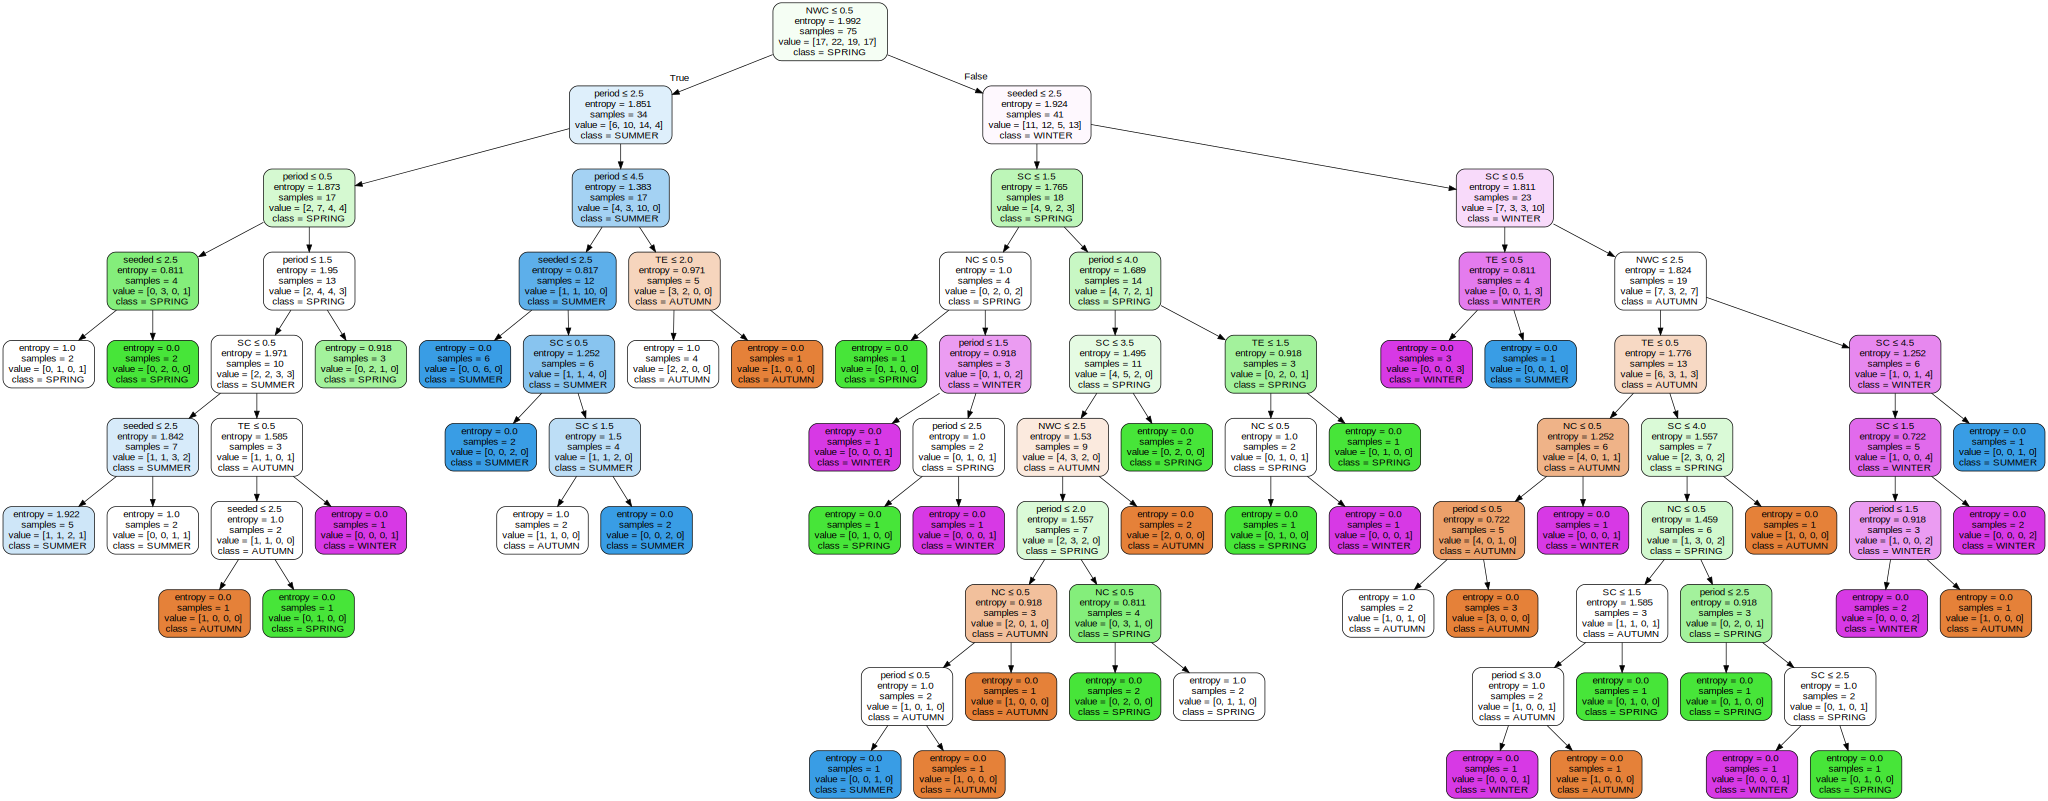

In [ ]:
dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Cloud")
dot_data = tree.export_graphviz(clf2, out_file=None, 
feature_names=['period', 'seeded', 'NC', 'SC', 'NWC', 'TE'], 
class_names=['AUTUMN', 'SPRING', 'SUMMER', 'WINTER'],
filled=True, rounded=True, 
special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

##6-3 max_depth 변화에 따른 트리변화

In [ ]:
depth_list = [2,5,10,20,40,50,200]
acc_list = []
for i in depth_list:
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    acc_list.append(acc)

print(acc_list)

[0.21212121212121213, 0.12121212121212122, 0.24242424242424243, 0.24242424242424243, 0.2727272727272727, 0.36363636363636365, 0.30303030303030304]


##6-4 graph 그려서 비교

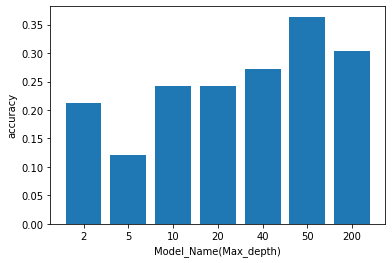

In [ ]:
x = np.arange(7)
plt.bar(x, acc_list)
plt.xticks(x, depth_list)
plt.xlabel('Model_Name(Max_depth)')
plt.ylabel('accuracy')
plt.show()

##6-5 optimal value
2가 가장 높으므로 optimal value = 2

#7번
Running IBL (K nearest neighbor)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

##7-1 N_neigbors에 따른 분류

In [ ]:
NN_list = [1,5,9,11,13]# 주어진 neighbors list
acc_list = []
for i in NN_list:#n_neighbor을 변수로 예측모델 실행
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    acc_list.append(acc)

In [ ]:
print(acc_list)

[0.21212121212121213, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


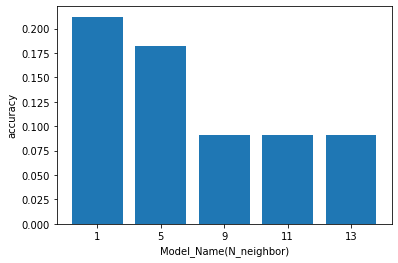

In [ ]:
x = np.arange(5)
plt.bar(x, acc_list)
plt.xticks(x, NN_list)
plt.xlabel('Model_Name(N_neighbor)')
plt.ylabel('accuracy')
plt.show()

##7-2 weight에 따른 분류

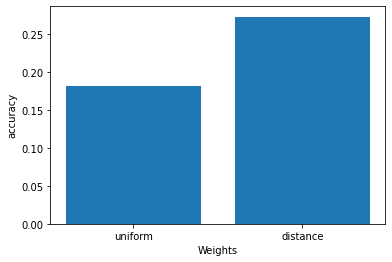

In [ ]:
clf1 = KNeighborsClassifier(weights= "uniform")
clf2 = KNeighborsClassifier(weights = "distance")

clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)

acc1 = accuracy_score(Y_test, pred1)
acc2 = accuracy_score(Y_test, pred2)

model = ['uniform', 'distance']
acc_list_W = [acc1, acc2]
x = np.arange(2)
plt.bar(x, acc_list_W)
plt.xticks(x, model)
plt.xlabel('Weights')
plt.ylabel('accuracy')
plt.show()

##7-3 p-value에 따른 분류

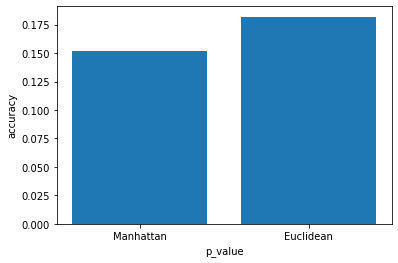

In [ ]:
clf1 = KNeighborsClassifier(p=1)
clf2 = KNeighborsClassifier(p=2)

clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)

acc1 = accuracy_score(Y_test, pred1)
acc2 = accuracy_score(Y_test, pred2)

model = ['Manhattan', 'Euclidean']
acc_list_P = [acc1, acc2]
x = np.arange(2)
plt.bar(x, acc_list_P)
plt.xticks(x, model)
plt.xlabel('p_value')
plt.ylabel('accuracy')
plt.show()